
### Jupyter Notebook
## 

# **Dataframe creation from raw JSON data**

<br>
<br>
by
<b>Gabriel Mesquida Masana</b><br>
<a href=mailto:gabmm@stanford.edu>gabmm@stanford.edu</a>
<br>

In [1]:
from flight import Flight as fl
import matplotlib
import pandas as pd
from tqdm import tqdm
import os

In [2]:
# Note this configuration for retina screens only
%config InlineBackend.figure_format = 'retina'

In [3]:
# More output formatting

matplotlib.style.use("classic")
pd.options.display.float_format = "{:,.2f}".format

### The name of the set to process

* Will be a subfolder from ```raw_data```
* Will be the filename + ```.pkl``` in the ```data``` folder 

In [4]:
set_name = "24-06_full"
time_gap = 4  # data sets contain samples every 4 seconds

In [5]:
subfolder = set_name + "/"
filename = set_name + ".pkl"
filename_exp = set_name + "_exp.pkl"

In [6]:
# Only if you're editing the extensions

%load_ext autoreload
%autoreload 2

In [7]:
# Get file list

file_names = [
    x for x in os.listdir(fl.DEFAULT_RAW_DIR_NAME + subfolder) if "json" in x
]
print(f"Retrieved {len(file_names)} files")

Retrieved 30 files


# Testing one file

In [8]:
flights = fl.raw_set_ingest(
    fl.DEFAULT_RAW_DIR_NAME + subfolder + file_names[0], time_gap=time_gap
)
len(flights), file_names[0]

(1752, 'fpltrkjoin-atmir-json-18june.json')

In [9]:
flights[0]

18/06/2024-12:33 SIA631 RJTT WSSS B77W

In [10]:
flights[0].fixes

ETO  Latitude  Longitude      FixName      FixType  ComputedFL  \
0   1718682415     14.70     122.33          JOM           RP         360   
1   1718684212     11.70     119.67        TOKON           RP         360   
2   1718684655     11.12     118.87        AGWAT           RP         360   
3   1718685183     10.44     117.91  1026N11755E      APR_FIX         360   
4   1718685236     10.36     117.80        TOSOV           RP         360   
5   1718685976      9.27     116.31        TENON           RP         360   
6   1718686200      8.95     115.86        TEGID           RP         360   
7   1718686209      8.94     115.84        ZSEC5    ENT_POINT         360   
8   1718688034      6.53     112.59        TODAM           RP         360   
9   1718689739      4.26     109.58        TERIX           RP         360   
10  1718690148      3.71     108.86        UKLIS           RP         360   
11  1718690149      3.71     108.86        ZWIIZ    EXT_POINT         360   
12  1718691152      2.37     107.10        BOBOB           RP         360   
13  1718691682      1.66     106.18        NIXEB           RP         340   
14  1718691682      1.66     106.18        ZSEC4    ENT_POINT         340   
15  1718691821      1.47     105.93  0129N10556E    EOC_POINT         340   
16  1718691908      1.36     105.79        TOMAN           RP         319   
17  1718692483      1.36     104.80  KEXAS360011   FEEDER_FIX         154   
18  1718692542      1.36     104.73         ZAPP  TRANS_POINT         140   
19  1718693166      1.36     104.03         ZTWR  TRANS_POINT           9   
20  1718693210      1.36     103.99         WSSS      AIRPORT           0   

    ComputedSpeed  
0          475.71  
1          475.59  
2          475.59  
3          475.59  
4          475.59  
5          475.59  
6          475.59  
7          475.59  
8          475.59  
9          475.59  
10         475.59  
11         475.59  
12         475.59  
13         475.59  
14         475.59  
15         453.79  
16         425.47  
17         291.25  
18         272.70  
19         180.00  
20         130.00

In [11]:
flights[0].tracks

Time  Latitude  Longitude  Altitude      Vx      Vy        Unix
Time                                                                 
0        0     10.45     117.90 10,972.80 -195.00 -177.25  1718685183
1        1     10.44     117.90 10,972.80 -194.25 -175.75  1718685186
2        2     10.44     117.89 10,972.80 -192.75 -169.50  1718685190
3        3     10.43     117.88 10,972.80 -192.00 -167.00  1718685194
4        4     10.42     117.88 10,972.80 -188.75 -162.50  1718685198
...    ...       ...        ...       ...     ...     ...         ...
2046  2046      1.40     104.00    152.40  -29.38  -69.38  1718693367
2048  2048      1.39     104.00    121.92  -29.50  -70.00  1718693375
2050  2050      1.39     103.99     91.44  -29.75  -70.38  1718693382
2051  2051      1.39     103.99     68.58  -29.75  -70.50  1718693388
2052  2052      1.38     103.99     53.34  -29.75  -70.50  1718693392

[1250 rows x 7 columns]

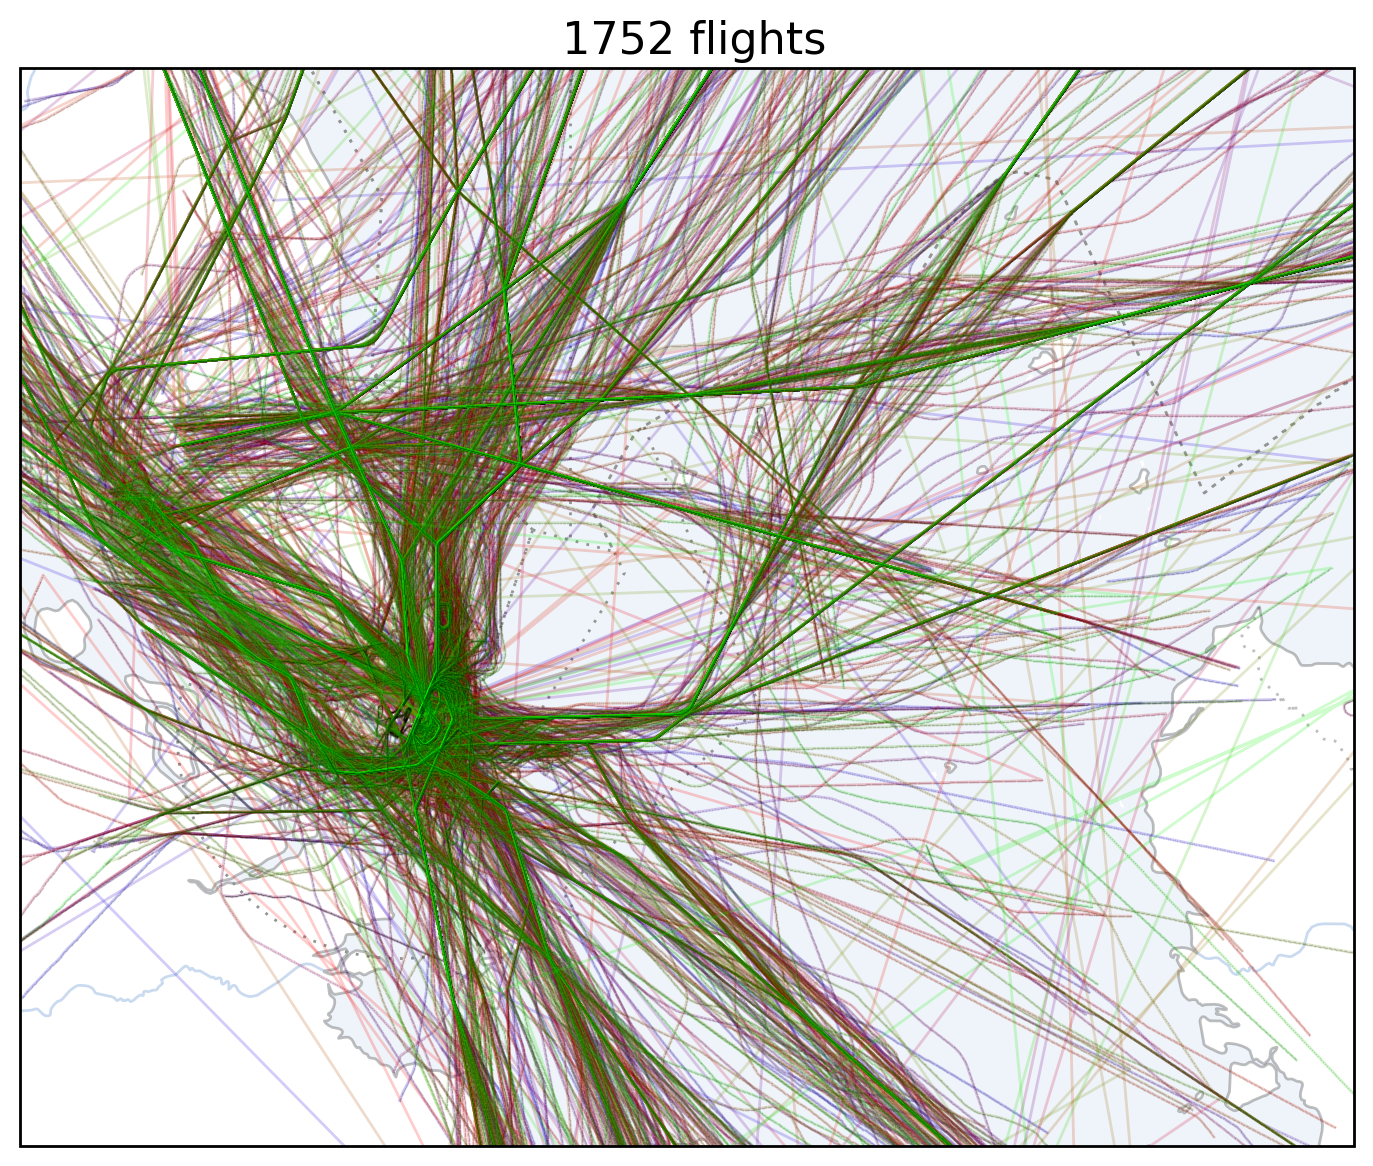

In [12]:
fl.plot_very_long_list(
    flights=flights,
    wide=500,
    alpha=0.2,
    cmap="brg",
    move_east=200,
    move_north=100,
    ratio=0.8,
)

# Full ingestion

In [13]:
all_flights = []

for file_name_ in tqdm(file_names):
    all_flights += fl.raw_set_ingest(
        fl.DEFAULT_RAW_DIR_NAME + subfolder + file_name_, time_gap=time_gap
    )

100%|██████████| 30/30 [19:18<00:00, 38.62s/it]


In [14]:
print(f"Loaded {len(all_flights)} flights")

Loaded 53225 flights


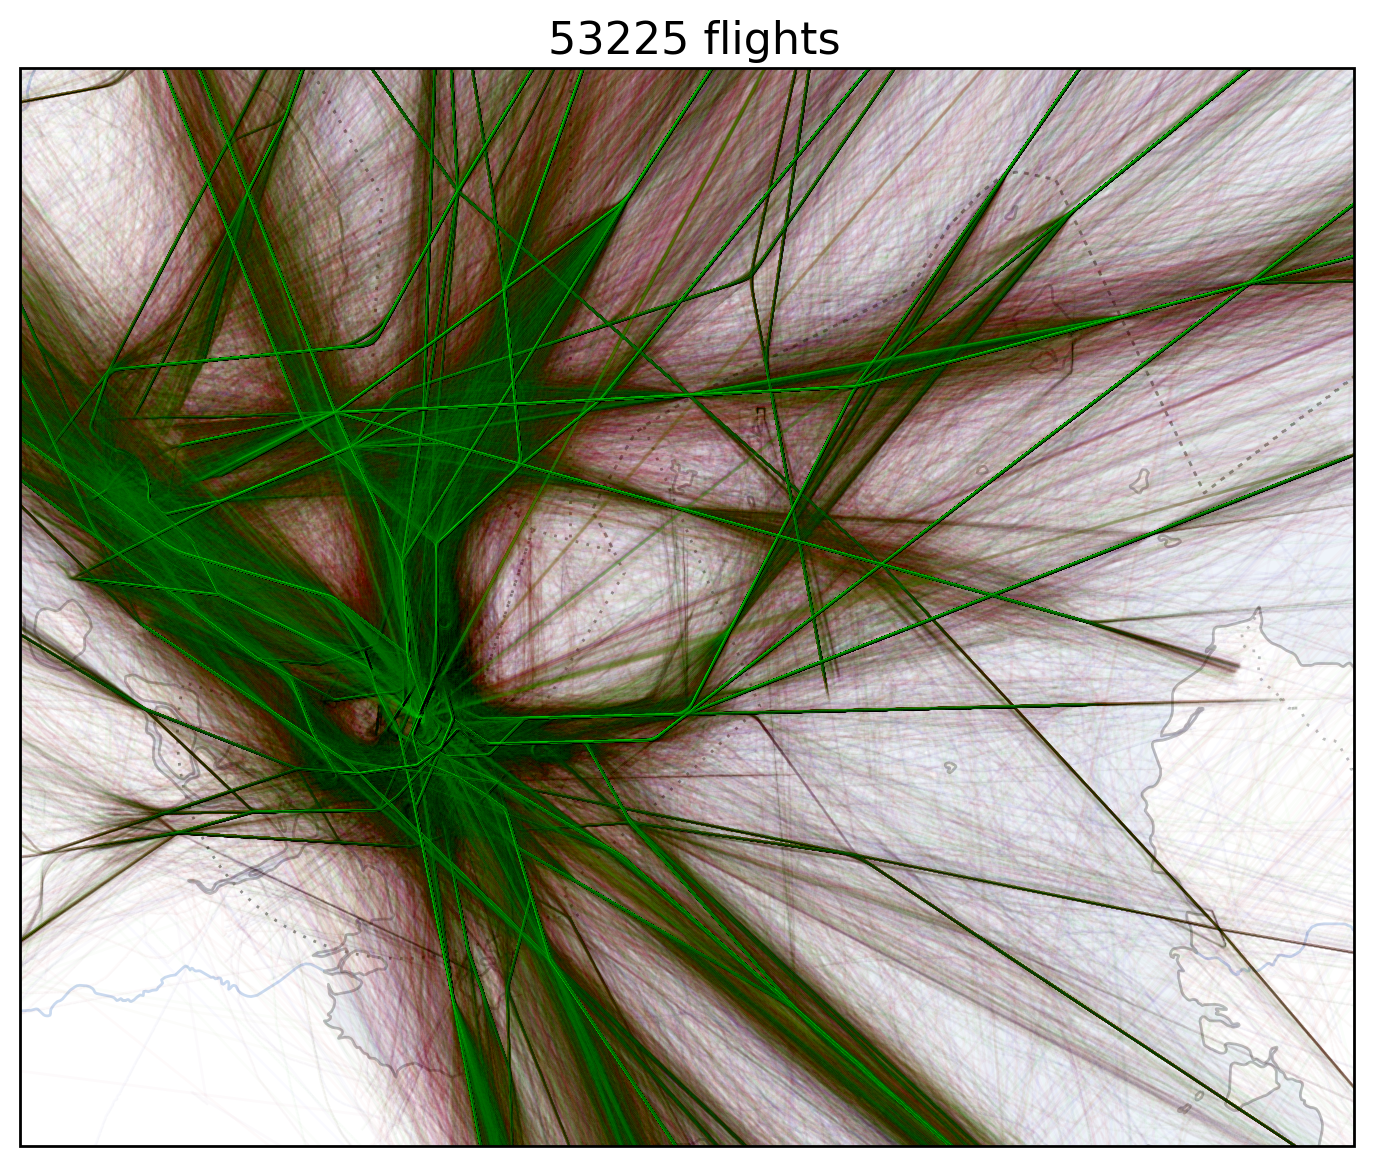

In [15]:
fl.plot_very_long_list(
    flights=all_flights,
    wide=500,
    alpha=0.02,
    cmap="brg",
    move_east=200,
    move_north=100,
    ratio=0.8,
)

### Removing flights too short

In [16]:
# remove flights too short

all_flights = [
    flight_
    for flight_ in all_flights
    if not flight_.tracks.empty
    if len(flight_.tracks) >= fl.MINTRACKS
]

print(f"After filtering {len(all_flights)} flights")

After filtering 52205 flights


# Flight interpolation and cleaning

In [17]:
for flight_ in tqdm(all_flights):
    flight_.interpolate(trace=False)

100%|██████████| 52205/52205 [31:56<00:00, 27.24it/s]  


### Removing empty tracks after interpolation

In [18]:
# Remove empty tracks after cleaning

clean_flights = []

for flight_ in all_flights:
    # Only if enough tracks
    if not flight_.tracks.empty:
        clean_flights.append(flight_)
    else:
        print(flight_.flight_id)

In [19]:
# Final check

for flight_ in clean_flights:
    if len(flight_.tracks[flight_.tracks.isnull().any(axis=1)]) > 0:
        raise ValueError(f"NaNs left in {flight_.flight_id}")

## Saving the clean set

In [20]:
fl.save_flights(flights=clean_flights, filename=filename)

Filtered 1819 duplicates in dataframe
Successfully saved 50386 flights


# Flight expansion

In [21]:
for flight_ in tqdm(clean_flights):
    if not flight_.is_expanded():
        flight_.expand_tracks()

100%|██████████| 52205/52205 [1:51:14<00:00,  7.82it/s]  


## Saving the expanded set

In [22]:
fl.save_flights(flights=clean_flights, filename=filename_exp)

Filtered 1819 duplicates in dataframe
Successfully saved 50386 flights
